In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utide import solve

In [3]:
from analysis_routines import *
from plotting_routines_xr import *
import ploting_routines as deprecated
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

## Límites b3

In [4]:
temp_s, pres_s, date_s = load_time_series('unprocessed/station7.nc')
df_station7 = load_SHDR_fit('station7_fit.csv', deprecated=True)
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')

b3 mean: -0.0024, b3 std: 0.00058
0   -0.002332
1   -0.001458
2   -0.002866
3   -0.002584
4   -0.002281
5   -0.003133
Name: b3, dtype: float64
Dates             1543396041
lat                43.799667
lon                  -3.7835
D1                  48.72341
b2                  0.028436
c2                  0.000935
b3                 -0.002332
a2                  2.747798
a1                  14.91673
a3                 12.168933
em                  0.040999
date     2018-11-28 09:07:21
Name: 0, dtype: object


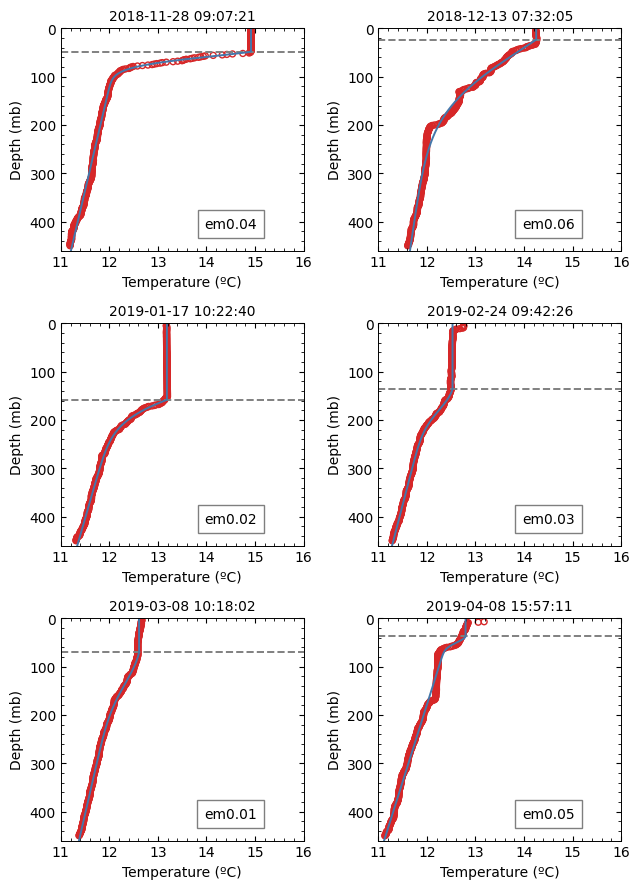

In [18]:
print('b3 mean: {:.4f}, b3 std: {:.5f}'.format(*mean_and_std(df_station7, 'b3')))
print(df_station7['b3'])
print(df_station7.iloc[0])
deprecated.plot_multiple_profiles(df_station7, temp_s, pres_s, range(0, len(date_s)))

lat    43.789000
lon     3.782000
D1     25.096412
b2      0.000000
c2      0.000046
b3     -0.002442
a2      0.039200
a1     12.487514
a3     12.448314
em      0.024572
Name: 2019-03-08 10:18:00, dtype: float64


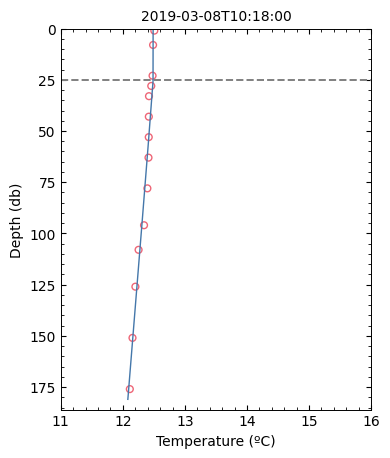

In [42]:
print(df_ci.loc[datetime(2019, 3, 8, 10, 18)])
plot_profile_fit(df_ci, data, datetime(2019, 3, 8, 10, 18))

In [ ]:
print(df_ci.loc[datetime(2018, 11, 28, 9, 7)])
plot_profile_fit(df_ci, data, datetime(2018, 11, 28, 9, 7))

In [ ]:
print(df_ci.loc[datetime(2018, 11, 28, 9, 7)])
plot_profile_fit(df_ci, data, datetime(2018, 11, 28, 9, 7))

In [27]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')

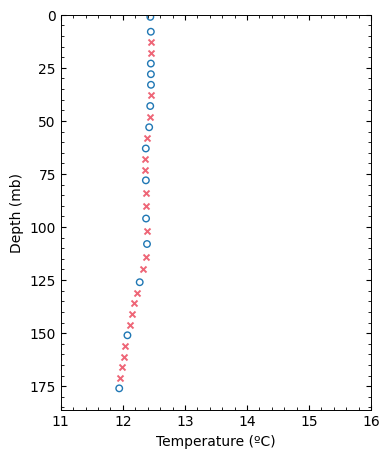

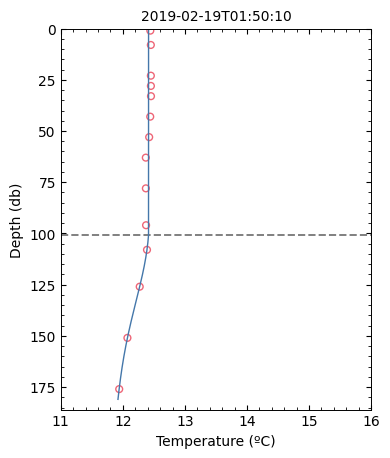

In [66]:
i = np.random.randint(0, len(data.date) - 1)
z = data.meassured_depth[i]
y = data.temp[i]
z_intlin = [13, 18, 38, 48, 58, 68, 73, 84, 90, 102, 114, 120, 131, 136, 141, 146, 156, 161, 166, 171]
_, y_intlin = interpolate(z, y, z_intlin)
plot_interpolation(z, y, z_intlin, y_intlin)
plot_profile_fit(df_ci, data, i)

In [131]:
g_05 = pd.read_csv('../scripts/hey.csv', index_col = 'date', parse_dates=True)

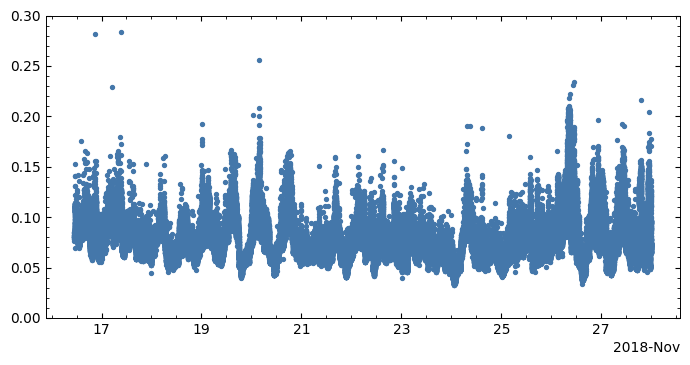

In [136]:
plot_arbitrary_variable(g_05.x, period=[None, datetime(2018, 11, 28)], ylim=[0, 0.3])

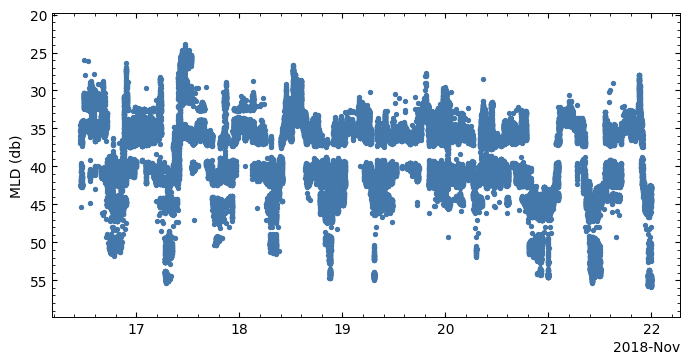

In [67]:
plot_fit_variable(df_ci, 'D1', period=[None, datetime(2018, 11, 22)])

In [69]:
from harmonic_analysis import *

In [78]:
b = coef_dataframe(g_05.date[:200000], g_05.x[:200000])

In [79]:
b

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,86.902531,52.428852,0.009494,0.002570,190.076257,15.599655
K1,23.934470,7.498895,6.864485,0.002789,0.002086,101.995520,42.757382
2SK5,4.797373,1.729480,5.774953,0.001339,0.001092,297.726159,46.730703
M6,4.140200,1.212780,6.671139,0.001122,0.000851,184.225249,43.491366
3MK7,3.529641,1.069777,4.747887,0.001053,0.000948,185.166576,51.656884
2MK5,4.930880,0.678890,2.266309,0.000839,0.001093,42.905323,74.576820
M4,6.210301,0.438031,2.036306,0.000674,0.000926,193.763072,78.551823
M3,8.280401,0.246911,0.441188,0.000506,0.001493,202.761144,169.255132
M8,3.105150,0.222705,1.776006,0.000481,0.000707,78.708628,84.248071


In [107]:
b = pd.read_csv(data_dir / 'SHDR_fit' / 'aux' / 'G05_ci.csv', index_col = 'date', parse_dates=True)

In [115]:
b[datetime(2018, 11, 16, 11):datetime(2018, 11, 16, 12)]

,x
date,
2018-11-16 11:00:00,0.076360
2018-11-16 11:00:05,0.079706
2018-11-16 11:00:10,0.080285
2018-11-16 11:00:15,0.078741
2018-11-16 11:00:20,NaN
...,...
2018-11-16 11:59:40,0.100299
2018-11-16 11:59:45,0.096200
2018-11-16 11:59:50,0.094527


In [126]:
b.loc[datetime(2018, 11, 16, 11)]

x    0.07636
Name: 2018-11-16 11:00:00, dtype: float64

In [138]:
def R_alpha_beta(row, alpha=0.05, beta=0.5):
    b2 = row['b2']
    c2 = row['c2']
    D1 = row['D1']
    
    if c2 == 0: # lambda tends towards 0
        R = np.log(beta) / np.log(alpha)
    
    elif b2 == 0: # lambda tends towards infinity
        R = np.sqrt(- np.log(alpha) / c2)
    
    else:
        lambda_ = 2 * c2 / b2**2
        R = (1 - np.sqrt(1 - 2*lambda_*np.log(beta))) / (1 - np.sqrt(1 - 2*np.log(alpha)))


In [137]:
print(np.log(0.5)/np.log(0.05))

0.23137821315975918
